##### Dados Titanic
Quais os fatores que fizeram as pessoas mais propensas a sobreviver?

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [183]:
data = data[pd.notnull(data['Age'])]
#data['SexInt'] = 1
#data.SexInt[data.Sex == 'female'] = 0

#data_test['SexInt'] = 1
#data_test.SexInt[data_test.Sex == 'female'] = 0
data_test = data_test[pd.notnull(data_test['Age'])]

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  424.000000  424.000000   424.000000  424.000000   
         mean    30.626179   22.965456    0.365566   442.299528    2.485849   
         std     14.172110   31.448825    0.878341   264.739548    0.743633   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.895800    0.000000   200.750000    2.000000   
         50%     28.000000   11.887500    0.000000   436.000000    3.000000   
         75%     39.000000   26.550000    0.000000   683.250000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  290.000000  290.000000   290.000000  290.000000   
         mean    28.343690   51.843205    0.527586   457.768966    1.872414   
         std     14.950952   70.458776    0.807147   250.845515    0.836617   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   13.000000    0.000000   260.500000    1.000000   
         50%     28.000000   26.250000    0.000000   452.000000    2.000000   
         75%     36.000000   66.200000    1.000000   669.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  424.000000  
         mean     0.525943  
         std      1.044760  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      5.000000  
1        count  290.000000  
         mean     0.493103  
         std      0.731132  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

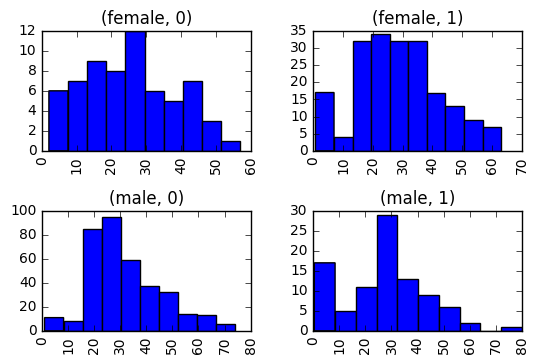

In [184]:
# hist

data.Age[data.Age.notnull()].hist(by=[data.Sex,data.Survived])

data[data.Age.notnull()].groupby(['Survived']).describe()

In [185]:
data_train_x=data.drop(['Survived','PassengerId','Ticket','Cabin','Sex','Name','Parch','SibSp','Embarked', 'Fare'],axis=1)
data_train_y=data['Survived']


data_test=data_test.drop(['PassengerId','Ticket','Cabin','Sex','Name','Parch','SibSp','Embarked', 'Fare'],axis=1)

# drop all nans
data_test.dropna(thresh=2)



,Pclass,Age
0,3,34.5
1,3,47.0
2,2,62.0
3,3,27.0
4,3,22.0
5,3,14.0
6,3,30.0
7,2,26.0
8,3,18.0
9,3,21.0


In [186]:
###Testar diferentes métodos
#####Random Forest, Logit, Naive Bayes, SVM

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
forest = RandomForestClassifier(n_estimators = 100)

In [189]:
forest.fit(data_train_x.values, data_train_y.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [166]:
# i need to do this ~> http://scikit-learn.org/stable/modules/preprocessing.html

Pclass      3.0000
Age        76.0000
Fare      512.3292
SexInt      1.0000
dtype: float64

In [190]:
forest.predict(data_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0,